Nota generada a partir de la [liga1](https://www.dropbox.com/s/jfrxanjls8kndjp/Diferenciacion_e_Integracion.pdf?dl=0) y [liga2](https://www.dropbox.com/s/mmd1uzvwhdwsyiu/4.3.2.Teoria_de_convexidad_Funciones_convexas.pdf?dl=0)

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

```
docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_r_kernel_local -p 8888:8888 -d palmoreck/jupyterlab_r_kernel:1.1.0
```

Detener el contenedor de docker:

```
docker stop jupyterlab_r_kernel_local
```


# Problema: ¿Cómo aproximar una función $f$ en un punto $x_1$?

Si $f$ es diferenciable en $x_0$ y $f^{(2)}$ está acotada entonces:

$$f(x_1) \approx f(x_0) + f^{(1)}(x_0)(x_1-x_0)$$

y se llama **aproximación de orden 1**. Ver final de esta nota para definición de diferenciabilidad y propiedades

**Obs:** obsérvese que lo anterior requiere de los valores: $x_0, x_1, f(x_0), f^{(1)}(x_0)$. Esta aproximación tiene un error de **orden** $2$ pues su error es **proporcional** al cuadrado del ancho del intervalo: $h=x_1-x_0$, esto es, si reducimos a la mitad $h$ entonces el error se reduce en una cuarta parte.

Otra aproximación más simple sería:

$$f(x_1) \approx f(x_0)$$

lo cual sólo requiere del conocimiento de $f(x_0)$ y se llama aproximación de **orden** $0$, sin embargo esta aproximación tiene un error de **orden** $1$ pues este es proporcional a $h$ , esto es, al reducir a la mitad $h$ se reduce a la mitad el error.

Estos errores los llamamos errores por **truncamiento**. Utilizamos la notación "O grande" $\mathcal{O}(\cdot)$ para escribir lo anterior:

$$f(x)-f(x_0)=\mathcal{O}(h)$$

con la variable $h=x-x_0$. Análogamente:

$$f(x)-(f(x_0)+f^{(1)}(x_0)(x-x_0)) = \mathcal{O}(h^2).$$

**Obs:** no confundir órdenes de  una aproximación con órdenes de error.

Otras aproximaciones a una función se pueden realizar con:

* Interpoladores polinomiales (representación por Vandermonde, Newton, Lagrange).

# Aproximación a una función por el teorema de Taylor

Las fórmulas de aproximación a las derivadas por diferencias finitas pueden obtenerse con los polinomios de Taylor presentes en el teorema del mismo autor, el cual, bajo ciertas hipótesis nos proporciona una expansión de una función alrededor de un punto. El teorema es el siguiente:

Sea $f \in \mathcal{C}^n([a,b])$, $f^{(n+1)}$ existe en [a,b]. Si $x_0 \in [a,b]$ entonces $\forall x \in [a,b]$ se tiene: $f(x) = P_n(x) + R_n(x)$ donde: 

$$P_n(x) = \displaystyle \sum_{k=0}^n \frac{f^{(k)}(x_0)(x-x_0)^k}{k!} \quad (f^{(0)} = f)$$ y $$R_n(x) = \frac{f^{(n+1)}(\xi_x)(x-x_0)^{(n+1)}}{(n+1)!}$$ con $\xi_x$ entre $x_0, x$ y $x_0$ se llama centro. Ver final de esta nota para definición del conjunto $\mathcal{C}^n([a,b])$.

**Comentarios:**

* El teorema de Taylor nos dice que cualquier función suave (función en $\mathcal{C}^n)$ se le puede aproximar por un polinomio en el intervalo $[a,b]$, de hecho $f(x) \approx P_n(x)$.

* El teorema de Taylor es una generalización del [teorema del valor medio para derivadas](https://en.wikipedia.org/wiki/Mean_value_theorem)

* $P_n(x)$ se le llama polinomio de Taylor alrededor de $x_0$ de orden $n$ y $R_n(x)$ es llamado residuo de Taylor alrededor de $x_0$ de orden $n$, tiene otras expresiones para representarlo y la que se utiliza en el enunciado es en su forma de Lagrange (ver [liga](https://en.wikipedia.org/wiki/Taylor%27s_theorem) para otras expresiones del residuo).

* $\xi_x$ es un punto entre $x_0, x$ desconocido y está en función de $x$ (por eso se le escribe un subíndice).

* Una forma del teorema de Taylor es escribirlo definiendo a la variable $h=x-x_0$:

$$f(x) = f(x_0+h) = P_n(h) + R_n(h) = \displaystyle \sum_{k=0}^n \frac{f^{(k)}(x_0)h^k}{k!} + \frac{f^{(n+1)}(\xi_h)h^{n+1}}{(n+1)!}$$

y escribimos: $R_n(h) = \mathcal{O}(h^{n+1})$.


## Ejemplo:

Aproximemos a la función $\frac{1}{x}$ en el intervalo $[1,2]$ con polinomios de Taylor de orden $n$ con $n \in \{0,1,2\}$ con centro en $x_0=1.5$. Los polinomios de Taylor son: 

$$P_0(x) = f(x_0) = \frac{2}{3} \quad \text{(constante)}$$

$$P_1(x) = f(x_0) + f^{(1)}(x_0)(x-x_0) = \frac{2}{3} - \frac{1}{x_0^2}(x-x_0) \quad \text{(lineal)}$$

$$P_2(x) = f(x_0) + f^{(1)}(x_0)(x-x_0) + \frac{f^{(2)}(x_0)(x-x_0)^2}{2} = \frac{2}{3} - \frac{1}{x_0^2}(x-x_0) + \frac{2}{x_0^3}(x-x_0)^2 \quad \text{(cuadrático)}$$

**Ejemplo: graficar la función y los polinomios de Taylor constante, lineal y cuadrático en una sola gráfica con `ggplot2` en el intervalo [1,2]. ¿Cuánto es la aproximación de los polinomios en x=1.9? Calcula el error relativo de tus aproximaciones.**

In [1]:
library(ggplot2)

In [2]:
options(repr.plot.width=6, repr.plot.height=6) #esta línea sólo se ejecuta para jupyterlab con R

In [3]:
Aprox_Taylor <- function(x,centro,n){
    length_x = length(x)
    evaluacion = rep(0,length_x)
    for(j in 1:length_x){
        constante = centro^(-2)
        evaluacion[j] = constante
        for(k in 1:n)
            constante = -1*centro^(-1)*(x[j]-centro)*constante
            evaluacion[j] = evaluacion[j]+(k+1)*constante
    }
    evaluacion
}

In [4]:
x0<-1.5
x<- seq(from=1,to=2,by=.005)
n<-c(0,1,2)
f<-function(z)1/z^2
y<-f(x)
y_Taylor_0<-1/x0^2*rep(1,length(x))
y_Taylor_1<-Aprox_Taylor(x,x0,1)
y_Taylor_2<-Aprox_Taylor(x,x0,2)

In [5]:
gf <- ggplot()

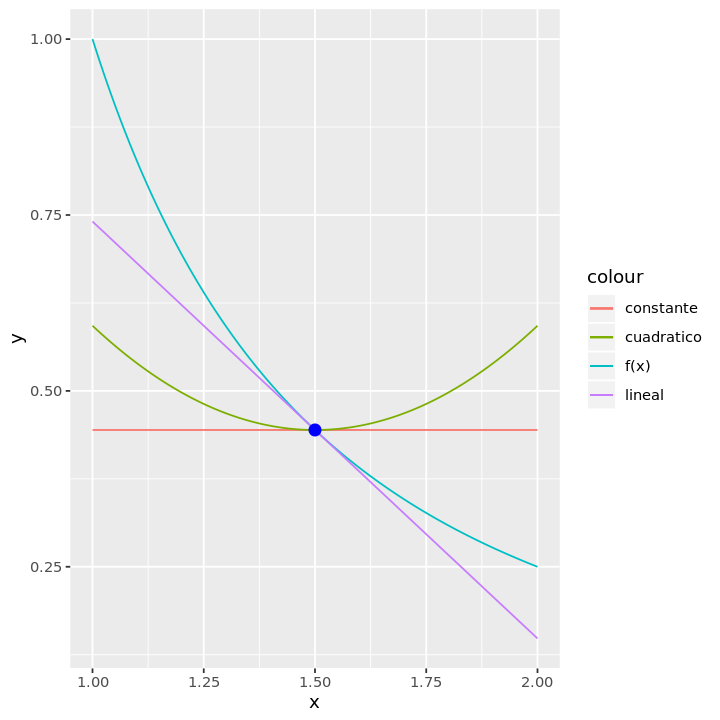

In [6]:
gf+
geom_line(aes(x=x,y=y,color='f(x)')) + 
geom_line(aes(x=x,y=y_Taylor_0,color='constante'))+
geom_line(aes(x=x,y=y_Taylor_1,color='lineal')) + 
geom_line(aes(x=x,y=y_Taylor_2,color='cuadratico')) + 
geom_point(aes(x=x0, y=f(x0)), colour='blue',size=3)

In [7]:
err_relativo<-function(aprox,obj){
    abs(aprox-obj)/abs(obj)
}

In [8]:
x_obj=1.9
f_x_obj=f(x_obj)
print('error relativo polinomio constante')
err_relativo(1/x0^2,f_x_obj)
print('error relativo polinomio lineal')
err_relativo(Aprox_Taylor(x_obj,x0,1),f_x_obj)
print('error relativo polinomio cuadrático')
err_relativo(Aprox_Taylor(x_obj,x0,2),f_x_obj)

[1] "error relativo polinomio constante"


[1] 0.6044444

[1] "error relativo polinomio lineal"


[1] 0.2512593

[1] "error relativo polinomio cuadrático"


[1] 0.9467259

**Pregunta:** ¿por qué se tiene mejor aproximación con un polinomio constante o lineal que con un polinomio cuadrático? ¿no deberíamos tener menor error al añadir más y más términos en el polinomio de Taylor? ¿de qué depende tener una buena aproximación al utilizar polinomios de Taylor para una función $f$ en general?.

**Ejercicio:** Aproximar $f(1)$ con polinomios de Taylor de orden $0,1,2,3,4,5$ si $f(x)=-0.1x^4-0.15x^3-0.5x^2-0.25x+1.2$ con centro en $x0=0$. Calcula errores relativos de tus aproximaciones. Realiza las gráficas de cada polinomio en el intervalo $[0,1]$ con `ggplot2`. Observa que $R_5(x)$ es cero.

# Diferenciación numérica

Las fórmulas de aproximación por **diferencias finitas** pueden obtenerse con el teorema de Taylor. Por ejemplo:

Sea $f \in \mathcal{C}^1([a,b])$ y $f^{(2)}$ existe y está acotada $\forall x \in [a,b]$ entonces, si $x+h \in [a,b]$ con $h>0$ por el teorema de Taylor:

$$f(x+h) = f(x) + f^{(1)}(x)h + f^{(2)}(\xi_{x+h})\frac{h^2}{2}$$ con $\xi_{x+h} \in [x,x+h]$ y al despejar $f^{(1)}(x)$ se tiene: 

$$f^{(1)}(x) = \frac{f(x+h)-f(x)}{h} - f^{(2)}(\xi_{x+h})\frac{h}{2}.$$

y escribimos:

$$f^{(1)}(x) = \frac{f(x+h)-f(x)}{h} + \mathcal{O}(h).$$

La aproximación $\frac{f(x+h)-f(x)}{h}$ es una fórmula por diferencias hacia delante con error de orden $1$. Gráficamente se tiene:

<p align="centered">
<img src="https://drive.google.com/uc?export=view&id=1G6LVavuH7e9nsrRZXNrjY_aMwm_0oV4Y" alt="a" heigth="500" width="500">
</p>



Con las mismas suposiciones es posible obtener la fórmula para la aproximación por diferencias hacia atrás:

$$f^{(1)}(x) = \frac{f(x)-f(x-h)}{h} + \mathcal{O}(h), h >0.$$

<p align="centered">
<img src="https://drive.google.com/uc?export=view&id=1mbPnS4stJ01ukwlfLYXUZmA5GexNiDhJ" alt="a" heigth="500" width="500">
</p>



Considerando $f \in \mathcal{C}^2([a,b]), f^{(3)}$ existe y está acotada $\forall x \in [a,b]$ si $x-h, x+h \in [a,b]$ y $h>0$ entonces:

$$f^{(1)}(x) = \frac{f(x+h)-f(x-h)}{2h} + \mathcal{O}(h^2), h >0.$$

y el cociente $\frac{f(x+h)-f(x-h)}{2h}$ es la aproximación por diferencias centradas con error de orden $2$. Gráficamente:

<p align="centered">
<img src="https://drive.google.com/uc?export=view&id=1pQs6RkoJPRr7du94H-AxWnbsMkbUIs-d" alt="a" heigth="500" width="500">
</p>



**Obs:** la aproximación por diferencias finitas a la primer derivada de la función tiene un error de orden $\mathcal{O}(h)$ por lo que una elección de $h$ igual a $.1 = 10^{-1}$ generará aproximaciones con alrededor de un dígito correcto.

**Obs:** la diferenciación numérica por diferencias finitas no es un proceso con una alta exactitud pues los problemas del redondeo de la aritmética en la máquina se hacen presentes en el mismo (ver nota [1.2 Sistema de punto flotante](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/I.computo_cientifico/1.2.Sistema_de_punto_flotante.ipynb)). Como ejemplo de esta situación hágase el siguiente ejercicio.

**Ejemplo: realizar una gráfica de log(error relativo) vs log(h) (h en el eje horizontal) con `ggplot2` para aproximar la primera derivada de $f(x)=e^{-x}$ en $x=1$ con $h \in \{10^{-16}, 10^{-14}, \dots , 10^{-1}\}$ y diferencias hacia delante. Valor a aproximar: $f^{(1)}(1) = -e^{-1}$**

In [9]:
f<-function(x){
    exp(-x)
}
aprox_1a_derivada<-function(f,x,h){
    (f(x+h)-f(x))/h
}

df<-function(x){
    -exp(-x)
}

err_absoluto<-function(aprox,obj){
    abs(aprox-obj)
}

err_relativo<-function(aprox,obj){
    abs(aprox-obj)/abs(obj)
}

x<-1

h<-10^(-16:-1)

err_absoluto_res<-err_absoluto(aprox_1a_derivada(f,x,h),df(x))
err_relativo_res<-err_relativo(aprox_1a_derivada(f,x,h),df(x))


gf<-ggplot()

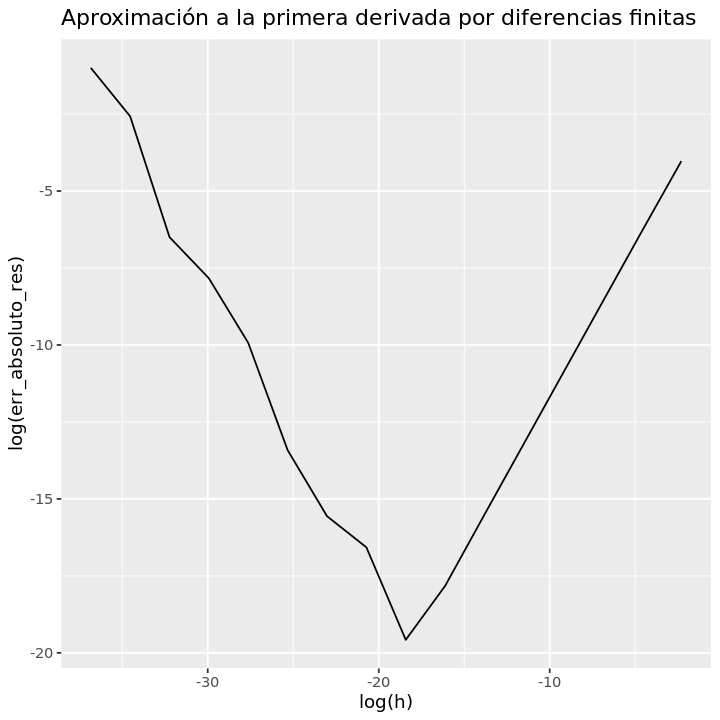

In [10]:
gf+
geom_line(aes(x=log(h),y=log(err_absoluto_res)))+
ggtitle('Aproximación a la primera derivada por diferencias finitas')

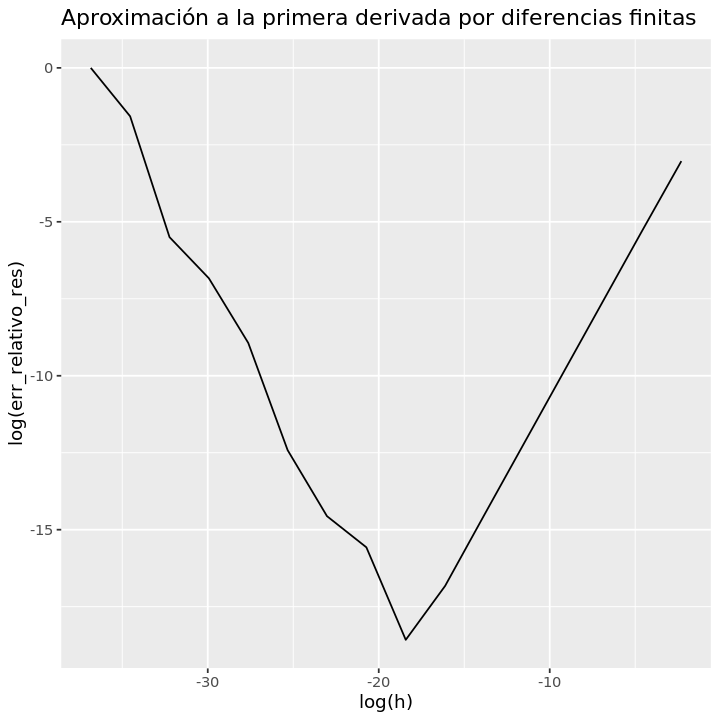

In [11]:
gf+
geom_line(aes(x=log(h),y=log(err_relativo_res)))+
ggtitle('Aproximación a la primera derivada por diferencias finitas')

**Ejercicio: realizar una gráfica de log(error relativo) vs log(h) (h en el eje horizontal) con `ggplot2` para aproximar la segunda derivada de $f(x)=e^{-x}$ en $x=1$ con $h \in \{10^{-16}, 10^{-14}, \dots , 10^{-1}\}$ y diferencias hacia delante. Valor a aproximar: $f^{(2)}(1) = e^{-1}$**. Usar:

$$\frac{d^2f(x)}{dx} = \frac{f(x+2h)-2f(x+h)+f(x)}{h^2} + \mathcal{O}(h)$$

que es una aproximación a la segunda derivada por diferencias hacia delante. Las versiones hacia atrás y centradas son respectivamente:

$$\frac{d^2f(x)}{dx} \approx \frac{f(x)-2f(x-h)+f(x-2h)}{h^2} + \mathcal{O}(h)$$

$$\frac{d^2f(x)}{dx} \approx \frac{f(x+h)-2f(x)+f(x-h)}{h^2} + \mathcal{O}(h^2)$$

## Análisis del error por redondeo y truncamiento en aproximación por diferencias finitas hacia delante

El ejemplo anterior muestra (vía una gráfica) que el método numérico de diferenciación numérica no es estable numéricamente respecto al redondeo (ver nota [1.3 Condicion de un problema y estabilidad de un algoritmo](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/I.computo_cientifico/1.3.Condicion_de_un_problema_y_estabilidad_de_un_algoritmo.ipynb) para definición de estabilidad de un algoritmo) y también se puede corroborar realizando un análisis del error. En esta sección consideramos la aproximación a la primer derivada por diferencias finitas hacia delante:

$$\frac{f(x+h)-f(x)}{h}$$

Suponemos que $\hat{f}(x)$ aproxima a $f(x)$ y por errores de redondeo $\hat{f}(x) = f(x)(1 + \epsilon_{f(x)})$ con $|\epsilon_{f(x)}| \leq \epsilon_{maq}$ error de redondeo al evaluar $f$ en $x$. $\hat{f}(x)$ es la aproximación en un SPFN (ver nota [1.2 Sistema de punto flotante](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/I.computo_cientifico/1.2.Sistema_de_punto_flotante.ipynb)). Además supóngase que $x,x+h,h \in \mathcal{Fl}$ . Entonces en la aproximación a la primer derivada por diferencias  hacia delante:

$f^{(1)}(x) = \frac{f(x+h)-f(x)}{h} + \mathcal{O}(h)$ y calculando el error absoluto:


$$\text{ErrAbs}\left ( \frac{\hat{f}(x+h)-\hat{f}(x)}{h} \right ) = \left |f^{(1)}(x) - \frac{\hat{f}(x+h)-\hat{f}(x)}{h} \right | = \left | \frac{f(x+h)-f(x)}{h} + \mathcal{O}(h) - \left ( \frac{f(x+h)(1+\epsilon_{f(x+h)})-f(x)(1+\epsilon_{f(x)})}{h} \right ) \right | =  \left |\mathcal{O}(h) - \frac{f(x+h)\epsilon_{f(x+h)}-f(x)\epsilon_{f(x)}}{h} \right | \leq \mathcal{O}(h) + \frac{C\epsilon_{maq}}{h}$$

suponiendo en el último paso que $|f(x+h)\epsilon_{f(x+h)} - f(x)\epsilon_{f(x)}| \leq C \epsilon_{maq}$ con $C>0$ constante que acota a la función $f$ en el intervalo $[a,b]$. Obsérvese que $\frac{\hat{f}(x+h)-\hat{f}(x)}{h}$ es la aproximación a la primer derivada por diferencias hacia delante que se obtiene en la computadora, por lo que la cantidad $\left |f^{(1)}(x) - \frac{\hat{f}(x+h)-\hat{f}(x)}{h} \right |$ es el error absoluto de la aproximación por diferencias hacia delante. 

El error relativo es:

$$\text{ErrRel}\left (\frac{\hat{f}(x+h)-\hat{f}(x)}{h} \right) = \frac{\text{ErrAbs}\left ( \frac{\hat{f}(x+h)-\hat{f}(x)}{h} \right )}{|f^{(1)}(x)|} \leq \frac{\mathcal{O}(h) + \frac{C\epsilon_{maq}}{h}}{|f^{(1)}(x)|} = K_1h + K_2\frac{1}{h}$$

con $K_1, K_2 >0$ constantes.

Entonces la función $g(h) = \mathcal{O}(h) + \mathcal{O}\left (\frac{1}{h} \right)$ acota al error absoluto y al error relativo y se tiene:

* Si $h \rightarrow 0$ la componente $\mathcal{O} \left ( \frac{1}{h} \right )$ domina a la componente $\mathcal{O}(h)$, la cual tiende a $0$.

* Si $h \rightarrow \infty$ la componente $\mathcal{O}(h)$ domina a $\mathcal{O} \left ( \frac{1}{h} \right )$, la cual tiende a $0$.

Por las dos observaciones anteriores, existe un valor de $h$ que minimiza a los errores. Tal valor se observa en las gráficas del valor absoluto y es igual a:

In [12]:
print(c(h[which.min(err_absoluto_res)],h[which.min(err_relativo_res)]))

[1] 1e-08 1e-08


**Ejercicio:** obtener de forma analítica el valor de $h$ que minimiza la función $g(h)$ anterior. Tip: utilizar criterio de primera y segunda derivada para encontrar mínimo global.

**Conclusiones y comentarios:** 

* La componente $\mathcal{O}(h)$ es el error por truncamiento, la cual resulta del teorema de Taylor. El teorema de Taylor nos indica que añadir términos en el polinomio de Taylor si la $x$ a aproximar es cercana al centro, las derivadas de $f$ son acotadas y $h \rightarrow 0$ entonces el error por truncamiento debe tender a $0$. Lo anterior no ocurre en la implantación numérica (corroborado de forma analítica y visual) del método por diferenciación numérica para la primer derivada por la presencia de la componente $\mathcal{O}\left(\frac{1}{h}\right)$ en los errores. Tal componente proviene del error por redondeo.

* Obsérvese que el error relativo máximo es del $100%$ lo que indica que no se tiene ninguna cifra correcta en la aproximación:


In [13]:
max(err_relativo_res)

[1] 1

y esto ocurre para un valor de $h$ igual a:

In [14]:
h[which.max(err_relativo_res)]

[1] 1e-16

**pregunta:** ¿por qué se alcanza el máximo error relativo en el valor de $h=10^{-16}$?.

* Un análisis de error similar se utiliza para el método de diferencias finitas por diferencias centradas para aproximar la primera derivada. En este caso el valor de $h$ que minimiza a los errores es del orden $h^* = 10^{-6}$.

---

# Definiciones utilizadas en el curso (algunas de ellas...)

Notación: $f: A \rightarrow B$ es una función de un conjunto $\text{dom}f \subseteq A$ en un conjunto $B$.

**Obs:** $\text{dom}f$ (el dominio de $f$) podría ser un subconjunto propio de $A$, esto es, algunos elementos de $A$ y otros no, son mapeados a elementos de $B$.

**Continuidad**

$f: \mathbb{R}^n \rightarrow \mathbb{R}^m$ es continua en $x \in \text{dom}f$ si $\forall \epsilon >0 \exists \delta > 0 $ tal que:

$$y \in \text{dom}f, ||y-x||_2 \leq \delta \implies ||f(y)-f(x)||_2 \leq \epsilon$$

**Obs:** 

* $f$ continua en un punto $x$ del dominio de $f$ entonces $f(y)$ es arbitrariamente cercana a $f(x)$ para $y$ en el dominio de $f$ cercana a $x$.

* Otra forma de definir que $f$ sea continua en $x \in \text{dom}f$ es con sucesiones y límites: si $\{x_i\}_{i \in \mathbb{N}} \subseteq \text{dom}f$ es una sucesión de puntos en el dominio de $f$ que converge a $x \in \text{dom}f$, $\displaystyle \lim_{i \rightarrow \infty}x_i = x$, y $f$ es continua en $x$ entonces la sucesión $\{f(x_i)\}_{i \in \mathbb{N}}$ converge a $f(x)$: $\displaystyle \lim_{i \rightarrow \infty}f(x_i) = f(x) = f \left(\displaystyle \lim_{i \rightarrow \infty} x_i \right )$.

**Notación:** $\mathcal{C}([a,b])=\{\text{funciones continuas en el intervalo [a,b]}\}$.

## Función Diferenciable

### Caso $f: \mathbb{R} \rightarrow \mathbb{R}$

$f$ es diferenciable en $x_0 \in (a,b)$ si $\displaystyle \lim_{x \rightarrow x_0} \frac{f(x)-f(x_0)}{x-x_0}$ existe y escribimos:

$$f^{(1)}(x_0) = \displaystyle \lim_{x \rightarrow x_0} \frac{f(x)-f(x_0)}{x-x_0}.$$

$f$ es diferenciable en $[a,b]$ si es diferenciable en cada punto de $[a,b]$. Análogamente definiendo la variable $h=x-x_0$ se tiene:


$f^{(1)}(x_0) = \displaystyle \lim_{h \rightarrow 0} \frac{f(x_0+h)-f(x_0)}{h}$ que típicamente se escribe como:

$$f^{(1)}(x) = \displaystyle \lim_{h \rightarrow 0} \frac{f(x+h)-f(x)}{h}.$$

**Comentario:** si $f$ es diferenciable en $x_0$ entonces $f(x) \approx f(x_0) + f^{(1)}(x_0)(x-x_0)$. Gráficamente:

<p align="centered">
<img src="https://drive.google.com/uc?export=view&id=1mPwOoCTbAUvf8QME7osyP5VUSIZ-20D7" alt="a" heigth="500" width="500">
</p>



**Notación:** $\mathcal{C}^n([a,b])=\{\text{funciones con } n \text{ derivadas continuas en el intervalo [a,b]}\}$.

### Caso $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$

$f$ es diferenciable en $x \in \text{intdom}f$ si existe una matriz $Df(x) \in \mathbb{R}^{m\times n}$ tal que:

$$\displaystyle \lim_{z \rightarrow x, z \neq x} \frac{||f(z)-f(x)-Df(x)(z-x)||_2}{||z-x||_2} = 0, z \in \text{dom}f$$

en este caso $Df(x)$ se llama la derivada de $f$ en $x$.

**Obs:** sólo puede existir a lo más una matriz que satisfaga el límite anterior.

**Comentarios:**

* $Df(x)$ también es llamada la **Jacobiana** de $f$.

* Se dice que $f$ es diferenciable si $\text{dom}f$ es abierto y es diferenciable en cada punto de $domf.$

* La función: $f(x) + Df(x)(z-x)$ es afín y se le llama **aproximación de orden $1$** de $f$ en $x$ (o también cerca de $x$). Para $z$ cercana a $x$ ésta aproximación es cercana a $f(z)$.

* $Df(x)$ puede encontrarse con la definición de límite anterior o con las derivadas parciales: $Df(x)_{ij} = \frac{\partial f_i(x)}{\partial x_j}, i=1,\dots,m, j=1,\dots,n$ definidas como:

$$\frac{\partial f_i(x)}{\partial x_j} = \displaystyle \lim_{h \rightarrow 0} \frac{f_i(x+he_j)-f_i(x)}{h}$$

donde: $f_i : \mathbb{R}^n \rightarrow \mathbb{R}$, $i=1,\dots,m,j=1,\dots,n$ y $e_j$ $j$-ésimo vector canónico que tiene un número $1$ en la posición $j$ y $0$ en las entradas restantes.

* Si $f: \mathbb{R}^n \rightarrow \mathbb{R}, Df(x) \in \mathbb{R}^{1\times n}$, su transpuesta se llama **gradiente**, el cual es un vector columna, se denota $\nabla f(x)$ y sus componentes son derivadas parciales: 

$$\nabla f(x) = Df(x)^T = \begin{array}{l}
\left[ \begin{array}{c}
\frac{\partial f(x)}{\partial x_1}\\
\vdots\\
\frac{\partial f(x)}{\partial x_n}
\end{array}
\right] = \left[ 
\begin{array}{c} 
\displaystyle \lim_{h \rightarrow 0} \frac{f(x+he_1) - f(x)}{h}\\
\vdots\\
\displaystyle \lim_{h \rightarrow 0} \frac{f(x+he_n) - f(x)}{h}
\end{array}
\right]
\end{array} \in \mathbb{R}^{n\times 1}.$$

En este contexto, la aproximación de primer orden en $x$ es: $f(x) + \nabla f(x)^T(z-x)$ para $z$ cercana a $x$.

## Regla de la cadena